In [25]:
#Listing 5.13
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Listing 5.7
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# tensorboard setup
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# directories
original_dataset_dir = '/Users/roy/Downloads/kaggle_original_data/PetImages'
base_dir = '/Users/roy/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()

# opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),   
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[tensorboard_callback])

model.save('cats_and_dogs_small_2.h5')

2021-12-08 21:20:51.695713: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-08 21:20:51.695727: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-08 21:20:51.696148: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)
Epoch 1/50
 1/50 [..............................] - ETA: 1:10 - loss: 0.6983 - accuracy: 0.3750

2021-12-08 21:20:53.865774: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-08 21:20:53.865794: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/50 [>.............................] - ETA: 25s - loss: 0.7161 - accuracy: 0.4062 

2021-12-08 21:20:54.420207: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-08 21:20:54.422464: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-08 21:20:54.425142: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211208-212051/train/plugins/profile/2021_12_08_21_20_54

2021-12-08 21:20:54.426780: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211208-212051/train/plugins/profile/2021_12_08_21_20_54/Roys-MacBook-Pro.local.trace.json.gz
2021-12-08 21:20:54.431475: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211208-212051/train/plugins/profile/2021_12_08_21_20_54

2021-12-08 21:20:54.431724: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/fit/20211208-212051/train/plugins/pro

50/50 [==============================] - 32s 615ms/step - loss: 0.6950 - accuracy: 0.5133 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 2/50
50/50 [==============================] - 27s 533ms/step - loss: 0.6891 - accuracy: 0.5448
Epoch 3/50
50/50 [==============================] - 27s 527ms/step - loss: 0.6845 - accuracy: 0.5442
Epoch 4/50
50/50 [==============================] - 27s 527ms/step - loss: 0.6803 - accuracy: 0.5763
Epoch 5/50
50/50 [==============================] - 26s 517ms/step - loss: 0.6717 - accuracy: 0.5713
Epoch 6/50
50/50 [==============================] - 26s 525ms/step - loss: 0.6684 - accuracy: 0.5953
Epoch 7/50
50/50 [==============================] - 26s 523ms/step - loss: 0.6526 - accuracy: 0.6187
Epoch 8/50
50/50 [==============================] - 26s 520ms/step - loss: 0.6603 - accuracy: 0.5985
Epoch 9/50
50/50 [==============================] - 26s 526ms/step - loss: 0.6476 - accuracy: 0.6332
Epoch 10/50
50/50 [==============================] - 26s 525

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

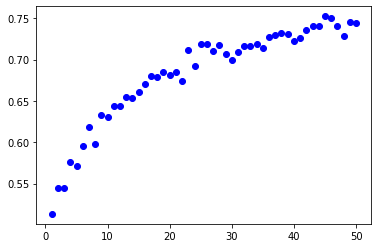

In [26]:
# Listing 5.10
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(1, len(acc) + 1)
epochs_val = range(1, len(acc) + 1)

# print(epochs_acc.shape)
# print(acc.shape)
# print(epochs_val.shape)
# print(val_acc.shape)

plt.plot(epochs_acc, acc, 'bo', label='Training acc')
plt.plot(epochs_val, val_acc, 'b', label='Validation acc')
# plt.legend()

# plt.plot(epochs_acc, loss, 'ro', label='Training loss')
# plt.plot(epochs_val, val_loss, 'r', label='Validation loss')
# plt.legend()

plt.show()

In [7]:
# Verify images
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(train_dogs_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
#Listing 5.14 Train the convnet using data-augmentation generators